# Clue: Period and Ovulation Tracker

# Problem Definition: Modeling Approach

Clue is a leading start-up working to help women track and understand patterns in their menstrual cycle. Clue provided menstrual cycle and symptom data, which is fully anonymized using WATTx’s Statice platform in order to ensure users’ privacy. The aim is to make sense of the data and build a prediction model for those symptoms. We want to help people understand what's coming by telling them what they'll experience next and help them spot underlying patterns they might not recognize.

In order to model this dataset, I think that there is an important balance between a user's personal history of symptoms and the symptom trends seen across the population. I also think that it would be useful for understand how the predictions are being made. In the optimal situation, a user would track every symptom they notice on every day of their period cycle. We saw that most users are only tracking symptoms during the first week of their cycle. This makes it more difficult to accurately predict what a user may experience during the rest of the cycle using an empirical approach.

In order to relay this type of prediction and pattern information to the user, I think that two separate approaches should be taken. 

## 1. Population Prediction

As a user who doesn't have a good understanding of cycle systems (in general, or introspectively), it would be good to see predictions based on what similar women tend to experience. This approach would predict what a user may experience based on metadata (age, BMI, country, cycle length, expected cycle length, theoretical likliness).

## 2. Individual History

As an individual who uses the app regularly, it would be useful to be able to see changes and patterns in individual tracking. This could signal pregnancy, diet, hormonal, or lifestyle change effects. Not only would this allow the users have a better understanding of their individual health, this type of information may augment the likliness that the user tracks symptoms on Clue on a consistant basis. For users that have logged data over multiple weeks, we can use this information to predict what they may see in the following weeks.


# Exploratory Analysis

In this analysis I worked to understand individual tracking behavior patterns to help get an initial understanding of what type of modeling could be performed based on an individual's history (#2).

In [1]:
'hide_me'
import pandas as pd
#graphing setup
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import countrycodes
import numpy as np

In [2]:
# This is a cell to hide code snippets from displaying
# Any cell that contains the word "hide_me" will be hidden.

from IPython.display import HTML

hide_me = 'hide_me'
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      if (id == 0 || $(this).html().indexOf('hide_me') > -1) {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input style="opacity:100" type="submit" value="View/Hide Code"></form>''')

In [3]:
'hide_me'
#load csv files
tracking_full=pd.read_csv(r'C:\Users\schro\Desktop\Projects\ClueWattx\cluehackathon\demo_data\tracking.csv')

symptoms = ['happy', 'pms', 'sad', 'sensitive_emotion', 'energized', 'exhausted',
                'high_energy', 'low_energy', 'cramps', 'headache', 'ovulation_pain',
                'tender_breasts', 'acne_skin', 'good_skin', 'oily_skin', 'dry_skin']
tracking = tracking_full[tracking_full.symptom.isin(symptoms)]
    
users=pd.read_csv(r'C:\Users\schro\Desktop\Projects\ClueWattx\cluehackathon\demo_data\users.csv')
cycles=pd.read_csv(r'C:\Users\schro\Desktop\Projects\ClueWattx\cluehackathon\demo_data\cycles.csv')
active_days=pd.read_csv(r'C:\Users\schro\Desktop\Projects\ClueWattx\cluehackathon\demo_data\active_days.csv')
cycles0=pd.read_csv(r'C:\Users\schro\Desktop\Projects\ClueWattx\cluehackathon\demo_data\cycles0.csv')
users['bmi']=users['weight']/users['height']/users['height']*10000


#days in 'normal' cycle
top_tracking=active_days[(active_days['day_in_cycle'] > 20) &(active_days['day_in_cycle'] <40)]


# Which Days of a Cycle are Users Tracking?

When looking at the distribution of tracking across cycle days, most women are clearly tracking during their period at the beginning of their cycle, around day 14 (ovulation), and at the end of their cycle (PMS).

(0, 70)

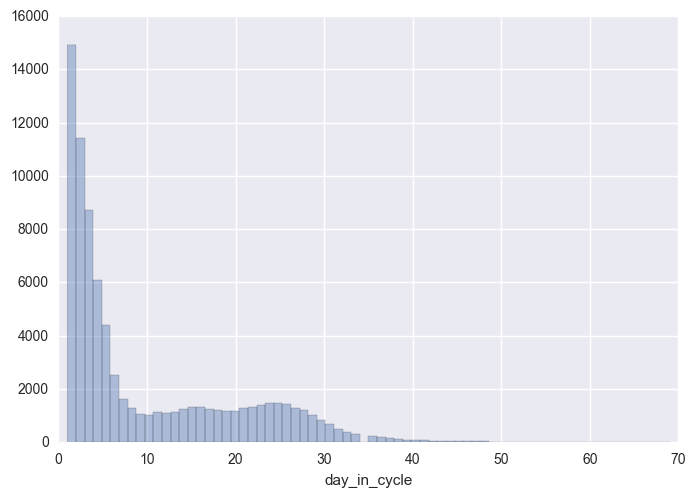

In [4]:
'hide_me'
#plot active days histogram
sns.distplot(active_days['day_in_cycle'][~np.isnan(active_days['day_in_cycle'])], kde=False, bins=70 )
plt.xlim(0,70)

# Population Tracking Trends

I investigated the day range across which people are tracking different symptoms. This is visualized as a boxplot of all days upon which any given sympom was reported. 

Most symptoms showed similar trends - the median 50% of data fell between days 1 and 6. Distributions were larger for acne, ovulation pain, pms, and tender breasts. I think that this may be related to the noticability of the symptoms and the psychological connection to the menstrual cycle. For symptoms like 'happy' or 'high energy', these may generally only be recorded if the user is already in the application to track bleeding.

Acne, ovulation pain, pms, and tender breasts are all symptoms that are more directly related to hormonal changes in many cases so they may be specifically tracked throughout the cycle. Although these symptoms have a wider distribution of day tracked, they are still tracked during the first ten days in the majority of cases.

This doesn't line up with the theoretical occurance. Ovulation pain is predicted occur around day 14, and sore breasts and acne during the luteal phase (after day 14). The large range of PMS occurance is justified theoretically since PMS can occur both during the last 2-3 days of the cycle and the first 3 days of menstruation.

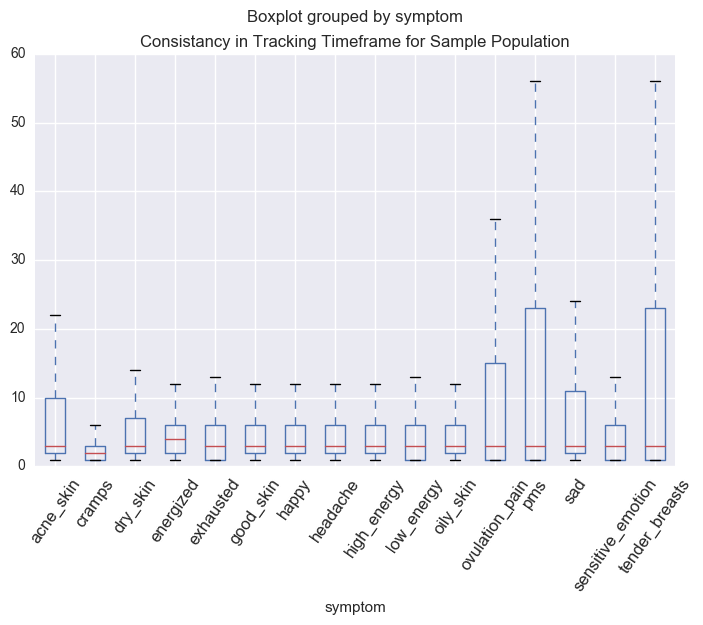

In [5]:
'hide_me'

tracking.boxplot(column='day_in_cycle', 
                          by='symptom')
plt.ylim((0,60))
plt.xticks(rotation=55)
plt.title('Consistancy in Tracking Timeframe for Sample Population')

# How Many Days During a Cycle are People Using the App?

According to womhealth.org, a 'normal' cycle length is 20-40 days [1]. 

I subsetted the active days dataset to later look at users tracking for 20-40 days during their cycle as well as those tracking for less than 10 days.

Less than 1% of entries were tracked for over 20 days while over 90% of entries


All entries 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20069 entries, 0 to 20068
Data columns (total 3 columns):
user_id         20069 non-null object
cycle_id        20069 non-null int64
day_in_cycle    20069 non-null int64
dtypes: int64(2), object(1)
memory usage: 470.4+ KB
None 


20-40 entries 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 668 to 19850
Data columns (total 3 columns):
user_id         89 non-null object
cycle_id        89 non-null int64
day_in_cycle    89 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.8+ KB
None 

Less than 10 entries 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18959 entries, 0 to 20068
Data columns (total 3 columns):
user_id         18959 non-null object
cycle_id        18959 non-null int64
day_in_cycle    18959 non-null int64
dtypes: int64(2), object(1)
memory usage: 592.5+ KB
None 



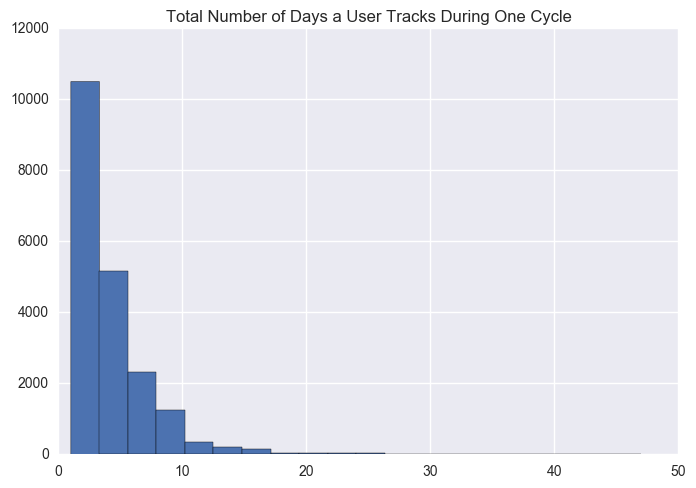

In [6]:
'hide_me'

#get user day size
active_users = active_days[['user_id','cycle_id', 'day_in_cycle']].groupby(['user_id','cycle_id']).count()
active_users.reset_index(level=active_users.index.names, inplace=True)

plt.hist(active_users['day_in_cycle'],bins=20)
plt.title('Total Number of Days a User Tracks During One Cycle')

#make list of user cycles with 20-40 entries
print '\n','All entries','\n',active_users.info(),'\n'
#make list of user cycles with 20 to 40 entries in a cycle
active_users2=active_users[(active_users['day_in_cycle'] > 20) &(active_users['day_in_cycle'] <40)]
print '\n','20-40 entries','\n', active_users2.info(),'\n' 

#make list of user cycles with less than 10 entries
inactive_users=active_users[active_users['day_in_cycle'] <10]
print 'Less than 10 entries','\n', inactive_users.info(),'\n'

# Cycle History 

For users with only 1-3 recorded cycles, the highest proportion of symptoms were tracked on the same day each month (over 30%). This is shown in the blue histogram below. The green histogram represents users having over 3 recorded cycles. The distribution for these users is similar, but there is less noise. This is a larger proportion with a difference of 4 days, 28 days, and a lower proportion with a difference of 0 days (likely due to more variation as more cycle data is included) and 4 day variation becomes more common.

I think that the spike around 28 days may be attributed to PMS, which can occur at both the beginning and end of the month. This would lead to a common difference of 28 days when PMS or cramps are experienced both at the beginning and end of the month. Distributions for individual each symptom are shown below.


(0, 50)

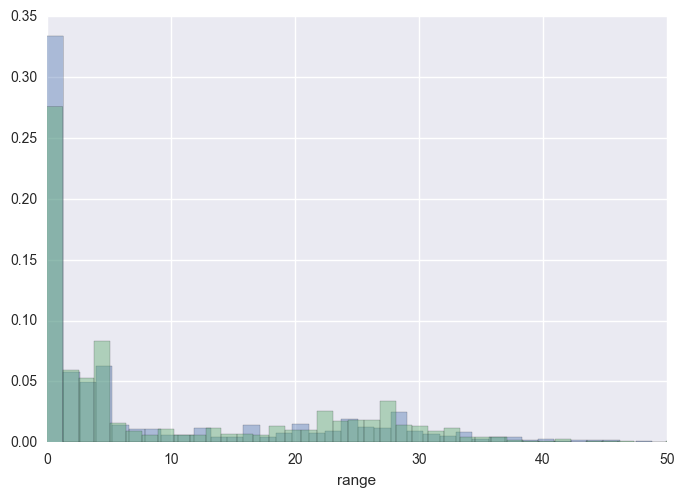

In [7]:
'hide_me'
def cycle_range(int1, int2):
    #use tracking data for users and find max cycle count
    user_num_cycles = tracking[['user_id', 'cycle_id']].groupby(['user_id']).max()
    user_num_cycles.reset_index(level=user_num_cycles.index.names, inplace=True)
    
    #subset data by integer
    tracking_3=user_num_cycles[(user_num_cycles['cycle_id']>int1) & (user_num_cycles['cycle_id']<int2)]
    tracking_3=pd.merge(tracking_3,tracking,on='user_id',how='left')

    #find range of days a symptom occurs per user throughout all cycles
    symptom_day_max = tracking_3[['user_id','symptom','cycle_id_y','day_in_cycle']].groupby(['user_id','symptom']).max()
    symptom_day_min = tracking_3[['user_id','symptom','cycle_id_y','day_in_cycle']].groupby(['user_id','symptom']).min()
    symptom_day_max['range']=symptom_day_max['day_in_cycle']-symptom_day_min['day_in_cycle']
    
    sns.distplot(symptom_day_max['range'],kde=False,norm_hist=True,bins=50)
cycle_range(1,4)
cycle_range(4,18)
plt.xlim((0,50))

# Symptom vs. Month-to-Month Occurance

For most of these symptoms, I saw similar trends as seen in the data above. When looking at users with at least 3 recorded cycles, it's easy to pick out differences among symptoms. Symptoms like dry skin and ovulation pain occured in the same timeframe each month.

Other symptoms seemed to occur more sporadically. The distributions for acne and low energy were flatter, showing that other factors besides menstrual cycle may be affecting the occurance of these symptoms.

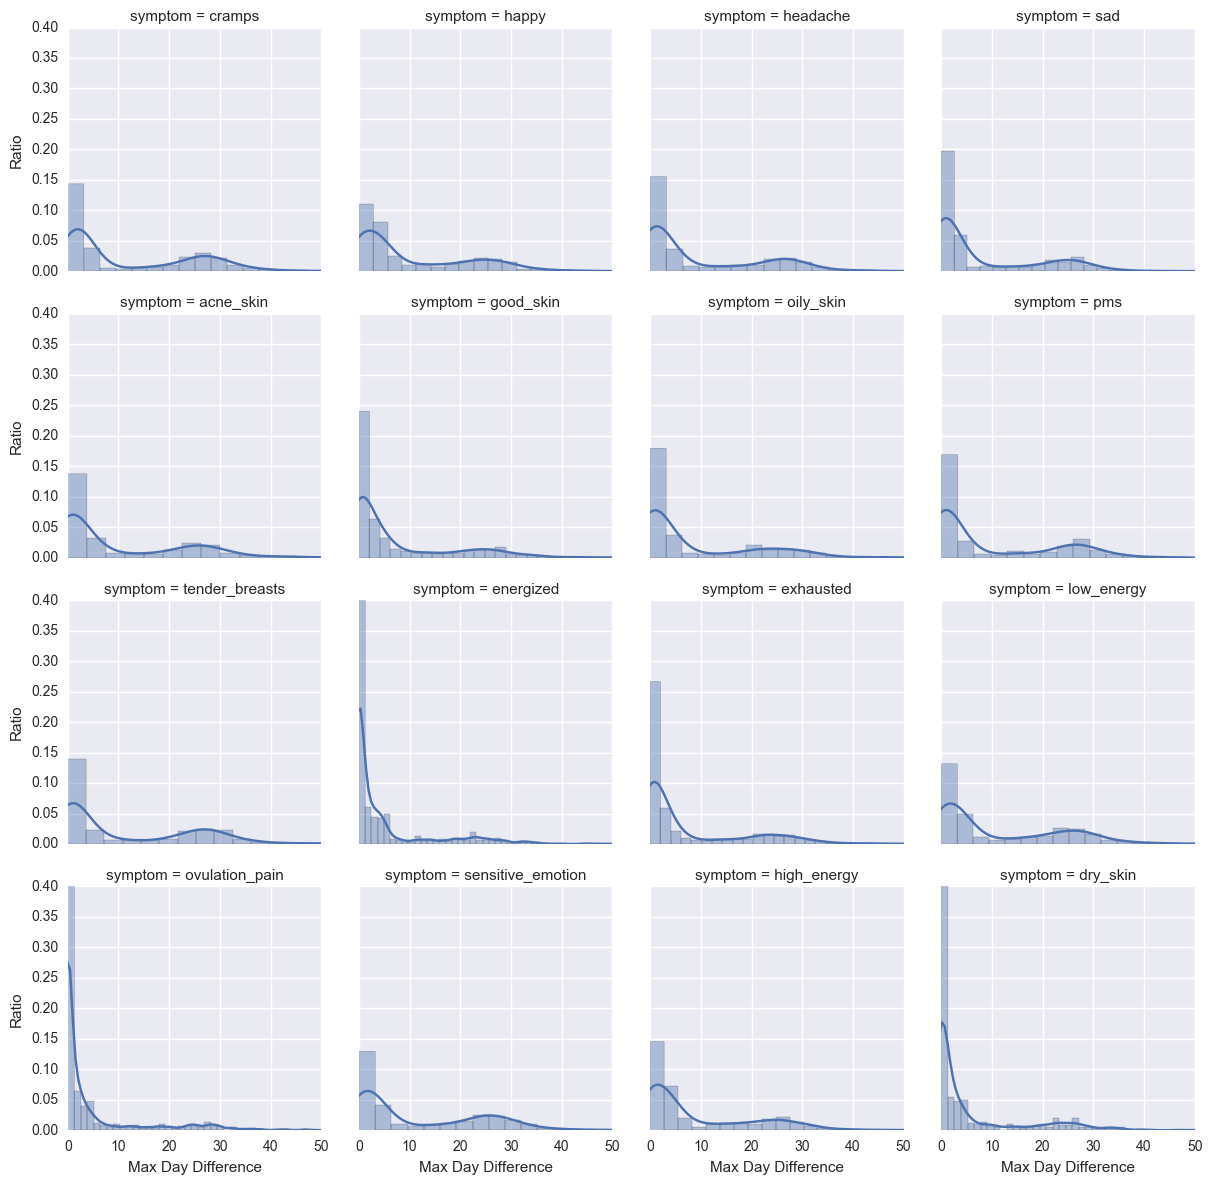

In [8]:
'hide_me'

def cycle_range(int1, int2):
    #use tracking data for users with more than 2 cycles tracked
    user_num_cycles = tracking[['user_id', 'cycle_id']].groupby(['user_id']).max()
    user_num_cycles.reset_index(level=user_num_cycles.index.names, inplace=True)

    tracking_3=user_num_cycles[(user_num_cycles['cycle_id']>int1) & (user_num_cycles['cycle_id']<int2)]
    tracking_3=pd.merge(tracking_3,tracking,on='user_id',how='left')

    #find range of days a symptom occurs per user throughout all cycles
    symptom_day_max = tracking_3[['user_id','symptom','cycle_id_y','day_in_cycle']].groupby(['user_id','symptom']).max()
    symptom_day_min = tracking_3[['user_id','symptom','cycle_id_y','day_in_cycle']].groupby(['user_id','symptom']).min()


    symptom_day_max['range']=symptom_day_max['day_in_cycle']-symptom_day_min['day_in_cycle']
    symptom_day_max.reset_index(level=symptom_day_max.index.names, inplace=True)
    #symptom_day_max=symptom_day_max[symptom_day_max['symptom']=='happy']

    g = sns.FacetGrid(symptom_day_max, col='symptom',col_wrap=4)
    g.map(sns.distplot, 'range')
    g.set_axis_labels('Max Day Difference', 'Ratio')
    g.set(xlim=(0,50),ylim=(0,.4))
cycle_range(2,18)



# Key Findings

1. The menstrual cycle is a loop and should be treated as such. 
If a simple algorithm is used to predict and individual's PMS symptoms, it's important to take into account the fact that the same symptom will often occur on both day 29 and day 1.

2. People are not using the app regularly.
If the goal is to predict what symptoms may occur on any day of the month, it would be important to get consistant data from a user (month-to-month and day-to-day). The majority of users are only tracking during their period. Offering regularly tracking users access to more prediction analysis could be a way to encourage consistant tracking.



# Appendix - ML Algorithm Start

In [17]:
'''
#feature creation

#create BMI column
users.loc[users['bmi'] < 19, 'bmi_label'] = 'underweight'
users.loc[users['bmi'] >= 19, 'bmi_label'] = 'healthy'
users.loc[users['bmi'] >= 25, 'bmi_label'] = 'overweight'
users.loc[users['bmi'] >= 30, 'bmi_label'] = 'obese'

#'normal' period length classification [1]
users['normal_length'] = 0
users.loc[(users['bmi'] <= 40), 'normal_length'] = 1
users.loc[(users['bmi'] <= 20), 'normal_length'] = 0

users.loc[users['bmi'] < 19, 'bmi_rank'] = int(0)
users.loc[users['bmi'] >= 19, 'bmi_rank'] = int(1)
users.loc[users['bmi'] >= 25, 'bmi_rank'] = int(2)
users.loc[users['bmi'] >= 30, 'bmi_rank'] = int(3)
users = users.fillna(method='ffill')

'''

"\n#feature creation\n\n#create BMI column\nusers.loc[users['bmi'] < 19, 'bmi_label'] = 'underweight'\nusers.loc[users['bmi'] >= 19, 'bmi_label'] = 'healthy'\nusers.loc[users['bmi'] >= 25, 'bmi_label'] = 'overweight'\nusers.loc[users['bmi'] >= 30, 'bmi_label'] = 'obese'\n\n#'normal' period length classification [1]\nusers['normal_length'] = 0\nusers.loc[(users['bmi'] <= 40), 'normal_length'] = 1\nusers.loc[(users['bmi'] <= 20), 'normal_length'] = 0\n\nusers.loc[users['bmi'] < 19, 'bmi_rank'] = int(0)\nusers.loc[users['bmi'] >= 19, 'bmi_rank'] = int(1)\nusers.loc[users['bmi'] >= 25, 'bmi_rank'] = int(2)\nusers.loc[users['bmi'] >= 30, 'bmi_rank'] = int(3)\nusers = users.fillna(method='ffill')\n\n"

In [16]:
'''#function to create result format using cross joins

def df_crossjoin(df1, df2, **kwargs):
    """
    Make a cross join (cartesian product) between two dataframes by using a constant temporary key.
    Also sets a MultiIndex which is the cartesian product of the indices of the input dataframes.
    See: https://github.com/pydata/pandas/issues/5401
    :param df1 dataframe 1
    :param df1 dataframe 2
    :param kwargs keyword arguments that will be passed to pd.merge()
    :return cross join of df1 and df2
    """
    df1['_tmpkey'] = 1
    df2['_tmpkey'] = 1

    res = pd.merge(df1, df2, on='_tmpkey', **kwargs).drop('_tmpkey', axis=1)
    res.index = pd.MultiIndex.from_product((df1.index, df2.index))

    df1.drop('_tmpkey', axis=1, inplace=True)
    df2.drop('_tmpkey', axis=1, inplace=True)

    return res

df_days = pd.DataFrame()
df_days['day_in_cycle'] = list(range(1,70))

#create dataframe dfraw with final format(every cycle0 user and every day)
df_raw = df_crossjoin(df_days, cycles0, suffixes=('_days', '_cycles'))
df_raw = df_raw[df_raw['day_in_cycle'] <= df_raw['expected_cycle_length']]
df_raw=df_raw.reset_index(drop=True)

symptoms = ['happy', 'pms', 'sad', 'sensitive_emotion', 'energized', 'exhausted',
                'high_energy', 'low_energy', 'cramps', 'headache', 'ovulation_pain',
                'tender_breasts', 'acne_skin', 'good_skin', 'oily_skin', 'dry_skin']

#create symptom column for each symptom
symptoms_df=pd.DataFrame(symptoms,columns=['symptom'])

df_raw_s = df_crossjoin(df_raw, symptoms_df)

#add tracking data for analysis
df_raw_cyc= pd.merge(df_raw_s, tracking, how='right', on=['user_id', 'day_in_cycle', 'symptom'],sort='user_id')

#delete col stating cycle 0
del df_raw_cyc['cycle_id_x']

#add user metadata
df_total=pd.merge(df_raw_cyc, users, how='left', on='user_id')
print df_total.head()
for sym in symptoms:
    df_total[sym]=0  
    df_total.loc[df_total['symptom'] == sym, sym] = 1
    
#remove nan in certain columns
df_total['cycle_id_y'].fillna(100, inplace=True)
df_total['bmi_rank'].fillna(100, inplace=True)
df_total['expected_cycle_length'].fillna(0, inplace=True)

#make float cols integers as necessary
df_total.cycle_id_y = df_total.cycle_id_y.astype(int)
df_total.expected_cycle_length = df_total.expected_cycle_length.astype(int)
df_total.bmi_rank = df_total.bmi_rank.astype(int)

cycles_av=df_total.cycle_id_y.unique()

print df_total.info()

'''

'#function to create result format using cross joins\n\ndef df_crossjoin(df1, df2, **kwargs):\n    """\n    Make a cross join (cartesian product) between two dataframes by using a constant temporary key.\n    Also sets a MultiIndex which is the cartesian product of the indices of the input dataframes.\n    See: https://github.com/pydata/pandas/issues/5401\n    :param df1 dataframe 1\n    :param df1 dataframe 2\n    :param kwargs keyword arguments that will be passed to pd.merge()\n    :return cross join of df1 and df2\n    """\n    df1[\'_tmpkey\'] = 1\n    df2[\'_tmpkey\'] = 1\n\n    res = pd.merge(df1, df2, on=\'_tmpkey\', **kwargs).drop(\'_tmpkey\', axis=1)\n    res.index = pd.MultiIndex.from_product((df1.index, df2.index))\n\n    df1.drop(\'_tmpkey\', axis=1, inplace=True)\n    df2.drop(\'_tmpkey\', axis=1, inplace=True)\n\n    return res\n\ndf_days = pd.DataFrame()\ndf_days[\'day_in_cycle\'] = list(range(1,70))\n\n#create dataframe dfraw with final format(every cycle0 user and eve

In [15]:
#ML based on population
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from sklearn import tree
from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
clf=tree.DecisionTreeClassifier()

  
columns = ['happy', 'pms', 'sad', 'sensitive_emotion', 'energized', 'exhausted',
                'high_energy', 'low_energy', 'headache', 'ovulation_pain',
                'tender_breasts', 'acne_skin', 'good_skin', 'oily_skin', 'dry_skin',
               'cycle_id_y','expected_cycle_length','day_in_cycle','bmi_rank']

#try ML alg for cramps
labels = df_total["cramps"].values
features = df_total[list(columns)].values
    
#split data into test and training datasets- training will always be the most recent cycle (simulating cycle 0)
labels_train, labels_test, features_train, features_test=cross_validation.train_test_split(
        labels,features,random_state=42,test_size=0.3)
    
#fit data to kbest algorithm
X_new = SelectKBest(f_classif,k='all')
X_new.fit_transform(features_train,labels_train)

#get indices for result report
indic= X_new.get_support(indices=True)

#create dataframe with scores and p values for each feature
feature=[]
score=[]
pvalue=[]
for i in indic:
    feature.append(columns[i])
    score.append(X_new.scores_[i])
    pvalue.append(X_new.pvalues_[i])

results_k=pd.DataFrame(index=['Feature','Score','P-value'],data=[feature,score,pvalue])    

#edit dataframe for readability
results_k=results_k.transpose()
results_k=results_k.sort('P-value')
print results_k

clf.fit(features_train, labels_train)
print clf.predict_proba(features_test)


C:\Users\schro\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\schro\Anaconda2\lib\site-packages\ipykernel\__main__.py:43: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


                  Feature    Score       P-value
0                   happy   2502.1             0
3       sensitive_emotion  2415.12             0
6             high_energy  1580.97             0
7              low_energy  2253.63             0
8                headache  1824.76             0
10         tender_breasts  1652.82             0
1                     pms  1273.65  2.38526e-277
11              acne_skin  1106.49  2.06906e-241
2                     sad  1066.89  6.89631e-233
17           day_in_cycle  979.666  4.17967e-214
5               exhausted  964.015  9.84831e-211
12              good_skin  698.114  2.33294e-153
13              oily_skin  660.216  3.62095e-145
9          ovulation_pain  527.266  2.09551e-116
4               energized  465.558  4.86986e-103
14               dry_skin  309.126   4.21498e-69
18               bmi_rank  13.5542   0.000231881
16  expected_cycle_length  4.93305     0.0263498
15             cycle_id_y   2.1296      0.144481
[[ 1.  0.]
 [ 1.  0.

[1] http://womhealth.org.au/conditions-and-treatments/understanding-your-menstrual-cycle-fact-sheet